# Limber's equation

## This notebook solve numerical the Limber's angular equation, see: https://arxiv.org/abs/astro-ph/0609165, equation (16).

In [1]:
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy import integrate
import pandas as pd
import numpy as np
import math as m

In [2]:
# Constant values
h = 0.674 # Hubble normalized constant 
r0 = (5.4/h) # in Mpc
rc = (2/h) # in Gpc
gamma0 = 1.77


X = 0.37 # sigma/rm = "ratio"
sigma = X*rc # For small X

In [3]:
# Analytic Integral (from Mathematica)
I = sigma*(1.25331*rc**2 + sigma*rc*m.exp(-0.5*rc**2/sigma**2) + 1.25331*sigma**2 + (1.25331*rc**2+1.25331*sigma**2)*m.erf(0.707107*rc/sigma))
A0 = m.sqrt(m.pi)*(r0**gamma0)*( gamma(gamma0/2-1/2) / gamma(gamma0/2) ) 
Aw = A0*I

theta = np.linspace(0.1, 2000,2000)
omega = Aw*(theta)**(1-gamma0)

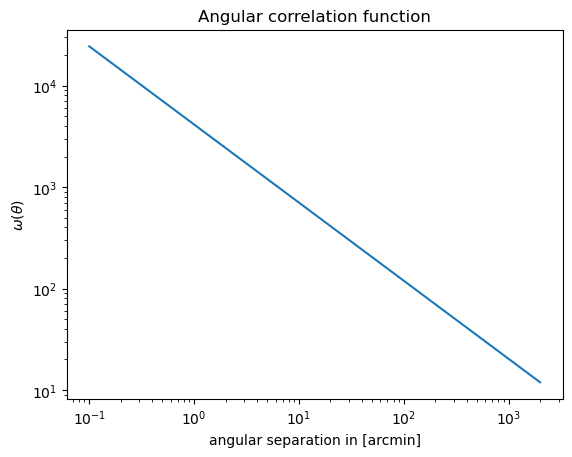

In [4]:
# Plot
plt.yscale("log")
plt.xscale("log")
plt.plot(theta, omega)

plt.xlabel(r'angular separation in [arcmin]')
plt.ylabel(r'$\omega (\theta)$')
plt.title('Angular correlation function')

plt.show()

## Numerical

In [5]:
# Assuming autocorrelation p_1 = p_2

a = 0
b = np.inf
sigma_p = X*rc # For small X
theta = np.linspace(0.1, 1, 100) # list of cos(theta) values
#theta = np.linspace(0.1, 1000,200)

In [6]:
def p(r):
    B = -0.5*(r-rc)**2/sigma_p**2
    A = 1e-2
    #A = 1
    return A*r**2*np.exp(B)

def delta(r, R):
    return (1/m.sqrt(2))*np.sqrt( (R**2 - 2*r**2*(1-np.cos(theta)))/(1+np.cos(theta)) )

def f(x, y):
    return 2*p(y - delta(x, y))*p(x + delta(x, y))*(y/r0)**(-gamma0)*y/delta(x, y)

def bounds_y():
    return [a, b]

def bounds_x(y):
    return [y*np.sqrt(2*(1-np.cos(theta))), 2*y]

In [7]:
temp = []
for i in theta:
    theta = i # re-set global value of 'd'
    temp.append(integrate.nquad(f, [bounds_x, bounds_y]))

C:\Users\David\AppData\Local\Temp\ipykernel_3004\768065377.py:8: RuntimeWarning: invalid value encountered in sqrt
  return (1/m.sqrt(2))*np.sqrt( (R**2 - 2*r**2*(1-np.cos(theta)))/(1+np.cos(theta)) )
D:\Anaconda\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
D:\Anaconda\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integr

In [8]:
temp = pd.DataFrame(temp, columns=['result', 'abserr'])
S = temp['result'].to_numpy()
theta_num = np.linspace(0.1, 1, 100)

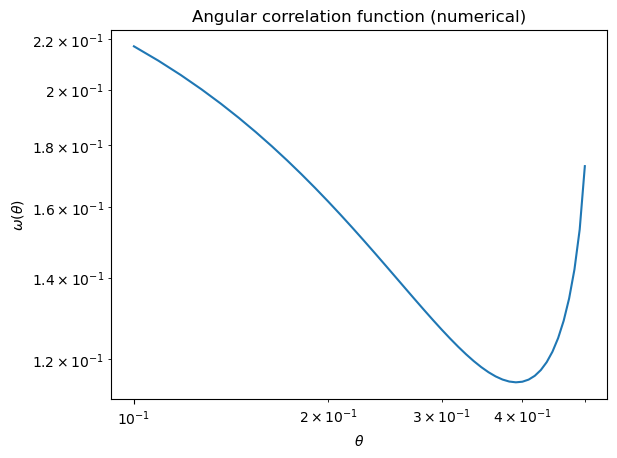

In [9]:
plt.yscale("log")
plt.xscale("log")
plt.plot(theta_num, (1/(1+np.cos(theta_num)))*S)

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega (\theta)$')
plt.title('Angular correlation function (numerical)')

plt.show()